# King County Housing Data: Nicoloe Johnson (Buyer)
Student: Claude Mindt-Kries

## General Process
1. **Understanding** (data, columns, types, domain)
2. **Hypothesis**: Key assumptions, questions to self
3. **Explore** (groups, skewness, centrality/spread), re-express if needed
4. **Clean** (missing calues, extremes, outliers)
5. **Relationships** (correlations)
6. **Hypothesis-Re-iteration** (assumption correct? right questions?)
7. **Fine tune** (keep only relevant plots, make clear and self explanatory)
8. **Explain** (document thought process, why what has been done)

<img src="./files/EDA_Checklist.png" alt="Checklist" style="width:100px;"/>

## Customer / Needs
Nicole Johnson wants to buy a house following the following criteria:
* lively neighborhood
* central location
* middle price range
* right timing: within a year (lowest price)
* Assumption: Nicole wants to establish a family (2 adults, 1-2 children) -> 2-3 bedrooms needed, >= 1000sqft (~100qm)

## Expected Output
1. This jupyter notebook (well documented, essence only), published to GitHub.
2. Presentation/slides 10 min + 5 min discussion
3. Updated README.
4. Optional: Python script cleaning data

## Expected Outcome I: Data Insights

<span style="color:red">Assumptions: *see through notebook and put them here*</span>

**At least 3 insights on overall data - 1 should be geographical.**

1. Geo: Location of houses on map show very is lively i.e. close neighborhood
2. Geo: Recommendation about central location
3. Middle Price Range: needs to be defined
4. Size: 2-3 Bedrooms


## Expected Outcome II: Client Recommendation
**Give advice to buyer which house to buy and why.**
1. ...
2. ...
3. ...


## Investigation
### Loading data, checking data types and domain

In [1]:
# importing standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Loading data
df_ori = pd.read_csv("./data/King_County_House_prices_dataset.csv")     # keeping a safe copy of original data
df = df_ori.copy()

In [3]:
from IPython.display import display                 # Allow for multiple outputs in one cell
pd.set_option('display.max_columns', None)          # Display all columns, otherwise one col 'condition' had been hidden
pd.options.display.float_format = "{:,.2f}".format  # rounding to 2 decimal numbers for display; data itself is not altered

# General understanding of data
display(df.head(10))
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}\n")
display(df.info())

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,"221,900.00",3,1.00,1180,5650,1.00,NaN,0.00,3,7,1180,0.0,1955,0.00,98178,47.51,-122.26,1340,5650
1,6414100192,12/9/2014,"538,000.00",3,2.25,2570,7242,2.00,0.00,0.00,3,7,2170,400.0,1951,"1,991.00",98125,47.72,-122.32,1690,7639
2,5631500400,2/25/2015,"180,000.00",2,1.00,770,10000,1.00,0.00,0.00,3,6,770,0.0,1933,NaN,98028,47.74,-122.23,2720,8062
3,2487200875,12/9/2014,"604,000.00",4,3.00,1960,5000,1.00,0.00,0.00,5,7,1050,910.0,1965,0.00,98136,47.52,-122.39,1360,5000
4,1954400510,2/18/2015,"510,000.00",3,2.00,1680,8080,1.00,0.00,0.00,3,8,1680,0.0,1987,0.00,98074,47.62,-122.05,1800,7503
5,7237550310,5/12/2014,"1,230,000.00",4,4.50,5420,101930,1.00,0.00,0.00,3,11,3890,1530.0,2001,0.00,98053,47.66,-122.00,4760,101930
6,1321400060,6/27/2014,"257,500.00",3,2.25,1715,6819,2.00,0.00,0.00,3,7,1715,?,1995,0.00,98003,47.31,-122.33,2238,6819
7,2008000270,1/15/2015,"291,850.00",3,1.50,1060,9711,1.00,0.00,NaN,3,7,1060,0.0,1963,0.00,98198,47.41,-122.31,1650,9711
8,2414600126,4/15/2015,"229,500.00",3,1.00,1780,7470,1.00,0.00,0.00,3,7,1050,730.0,1960,0.00,98146,47.51,-122.34,1780,8113
9,3793500160,3/12/2015,"323,000.00",3,2.50,1890,6560,2.00,0.00,0.00,3,7,1890,0.0,2003,0.00,98038,47.37,-122.03,2390,7570


Rows: 21597, Columns: 21

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non

None

#### Observations on Data Types
1. Date is of type 'object' and should be **converted to date** ✅
2. ~~Some numbers should be **rounded** to 2 decimals (not longitude/latitude though)~~ ✅
3. Floors & price might be possible to **translate to int** (needs checking) (performance improvements) ✅
4. yr_renovated is float, **should be date or int** ✅
5. **empty values** at least in yr_renovated, waterfront, view (and possibly others) ✅
6. 'waterfront' should be **type bool** ✅
7. Check for **duplicates**! ✅
8. **Unclear** How can houses have been sold with 0 views?
9. **Unclear** what 'grade' tells in general (is low good or bad?) -> ask if data is critical

#### Initial Hypotheses & Questions to self
1. A **lively neighborhood** (wanted) could be defined by mapping houses to a map (density).
2. I assume houses at the waterfront would be less lively i.e. less cental (central location wanted)
3. The price range and **middle price range (wanted)** can be defined
4. A **good point in time** can be estimated by looking at house prices and when in the year they had been comparably low
5. No info is available about Nicole, I assume she is looking for a house **suitable to start a small family (2 adults, 1-2 children) i.e. 2-3 bedrooms**

### Renaming for better readability

In [4]:
columns_mapping = {
    'id': 'ID',
    'date': 'Date_Sold',
    'price': 'Price',
    'bedrooms': 'Rooms_Bed',
    'bathrooms': 'Rooms_Bath',
    'floors': 'Floors',
    'sqft_living': 'Sqft_Living',
    'sqft_lot': 'Sqft_Lot',
    'waterfront': 'Waterfront',
    'condition': 'Condition',
    'sqft_above': 'Sqft_above',
    'sqft_basement': 'Sqft_basement',
    'yr_built': 'Yr_Built',
    'yr_renovated': 'Yr_Renovated',
    'zipcode': 'ZIP',
    'lat': 'Lat',
    'long': 'Long',
    'sqft_living15': 'Sqft_living15',
    'sqft_lot15': 'Sqft_lot15',
    'renovated': 'Renovated',
    'view': 'Viewed',
    'grade': 'Grade',
}

df.rename(columns=columns_mapping, inplace=True)
df.sort_index(axis=1, inplace=True) # Sort columns alphabetically
df.head()

,Condition,Date_Sold,Floors,Grade,ID,Lat,Long,Price,Rooms_Bath,Rooms_Bed,Sqft_Living,Sqft_Lot,Sqft_above,Sqft_basement,Sqft_living15,Sqft_lot15,Viewed,Waterfront,Yr_Built,Yr_Renovated,ZIP
0,3,10/13/2014,1.00,7,7129300520,47.51,-122.26,"221,900.00",1.00,3,1180,5650,1180,0.0,1340,5650,0.00,NaN,1955,0.00,98178
1,3,12/9/2014,2.00,7,6414100192,47.72,-122.32,"538,000.00",2.25,3,2570,7242,2170,400.0,1690,7639,0.00,0.00,1951,"1,991.00",98125
2,3,2/25/2015,1.00,6,5631500400,47.74,-122.23,"180,000.00",1.00,2,770,10000,770,0.0,2720,8062,0.00,0.00,1933,NaN,98028
3,5,12/9/2014,1.00,7,2487200875,47.52,-122.39,"604,000.00",3.00,4,1960,5000,1050,910.0,1360,5000,0.00,0.00,1965,0.00,98136
4,3,2/18/2015,1.00,8,1954400510,47.62,-122.05,"510,000.00",2.00,3,1680,8080,1680,0.0,1800,7503,0.00,0.00,1987,0.00,98074


### Data Cleaning


In [5]:
# Converting date / timestamps

# Checking for null values
date_cols = [ 'Date_Sold', 'Yr_Built', 'Yr_Renovated' ]
def check_null(cols):
    for col in cols:
        nan = df[col].isnull().sum()
        print(f"There are {nan} null values in column {col}")

check_null(date_cols)

There are 0 null values in column Date_Sold
There are 0 null values in column Yr_Built
There are 3842 null values in column Yr_Renovated


#### Date conversions

<span style="color:red">**Assumption**: I assume that a "null" value in yr_renovated means, the object had not been renovated until end of data collection</span>

In [6]:

# Convert do dates
df['Date_Sold'] = pd.to_datetime(df['Date_Sold'], format='%m/%d/%Y')
# Adding Month_sold to research if certain month of year affect price
df['Month_Sold'] = df.Date_Sold.dt.month
df['Yr_Built'] = pd.to_datetime(df['Yr_Built'], format='%Y').dt.year

# yr_renovated contains 0, NaN and floats. Everything else than a float > 0 should be treated as NaN
df['Yr_Renovated'] = pd.to_datetime(df['Yr_Renovated'], format='%Y', errors='coerce').dt.year           # Grab the year
df['Yr_Renovated'] = df['Yr_Renovated'].fillna(-1)                                                      # Replace NaN values with a placeholder value 0
df['Yr_Renovated'] = df['Yr_Renovated'].astype(int)                                                     # convert year to integer (otherwise it is shown as float, weirdly)

df['Renovated'] = df['Yr_Renovated'].apply(lambda x: 1 if x > 0 else 0)                                 # Add a column: 1 for renovated, 0 for not renovated
df.sort_index(axis=1, inplace=True)                                                                     # Sort columns alphabetically
df['Renovated'].value_counts()


Renovated
0    20853
1      744
Name: count, dtype: int64

#### Other conversions

<span style="color:red">**Assumption**: NA in column view means not viewed</span>

In [7]:
df['Rooms_Bath'] = df['Rooms_Bath'].astype(int)         # no fractions of bathrooms -> int
df['Waterfront'] = df['Waterfront'].astype(bool)        # Waterfront can be yes or no -> bool

# Convert type object to numeric/float, filling non-numeric with Nan (errors='coerce')
df['Sqft_basement'] = pd.to_numeric(df['Sqft_basement'], errors='coerce')
df['Sqft_basement'] = df['Sqft_basement'].astype(float)

print(f"There are {df['Viewed'].isna().sum()} null values in Viewed. I assume we can set those to 0.")
df['Viewed'] = df['Viewed'].fillna(0)                   # Set na to 0, assuming na means not viewed
df['Viewed'] = df['Viewed'].astype(int)
df['Viewed'].value_counts()



There are 63 null values in Viewed. I assume we can set those to 0.


Viewed
0    19485
2      957
3      508
1      330
4      317
Name: count, dtype: int64

#### Checking for duplicates

In [8]:
dups = df.duplicated().sum()
if dups > 0:
    print(f"Number of duplicates found: {dups}")
else:
    print("No duplicates found (count is 0)")

No duplicates found (count is 0)


#### Remove unnecessary

In [9]:
# As it is not about those specific houses, we can drop the ID
df.drop(['ID'], axis=1, inplace=True)
df.head(20)

,Condition,Date_Sold,Floors,Grade,Lat,Long,Month_Sold,Price,Renovated,Rooms_Bath,Rooms_Bed,Sqft_Living,Sqft_Lot,Sqft_above,Sqft_basement,Sqft_living15,Sqft_lot15,Viewed,Waterfront,Yr_Built,Yr_Renovated,ZIP
0,3,2014-10-13,1.00,7,47.51,-122.26,10,"221,900.00",0,1,3,1180,5650,1180,0.00,1340,5650,0,True,1955,-1,98178
1,3,2014-12-09,2.00,7,47.72,-122.32,12,"538,000.00",1,2,3,2570,7242,2170,400.00,1690,7639,0,False,1951,1991,98125
2,3,2015-02-25,1.00,6,47.74,-122.23,2,"180,000.00",0,1,2,770,10000,770,0.00,2720,8062,0,False,1933,-1,98028
3,5,2014-12-09,1.00,7,47.52,-122.39,12,"604,000.00",0,3,4,1960,5000,1050,910.00,1360,5000,0,False,1965,-1,98136
4,3,2015-02-18,1.00,8,47.62,-122.05,2,"510,000.00",0,2,3,1680,8080,1680,0.00,1800,7503,0,False,1987,-1,98074
5,3,2014-05-12,1.00,11,47.66,-122.00,5,"1,230,000.00",0,4,4,5420,101930,3890,"1,530.00",4760,101930,0,False,2001,-1,98053
6,3,2014-06-27,2.00,7,47.31,-122.33,6,"257,500.00",0,2,3,1715,6819,1715,NaN,2238,6819,0,False,1995,-1,98003
7,3,2015-01-15,1.00,7,47.41,-122.31,1,"291,850.00",0,1,3,1060,9711,1060,0.00,1650,9711,0,False,1963,-1,98198
8,3,2015-04-15,1.00,7,47.51,-122.34,4,"229,500.00",0,1,3,1780,7470,1050,730.00,1780,8113,0,False,1960,-1,98146
9,3,2015-03-12,2.00,7,47.37,-122.03,3,"323,000.00",0,2,3,1890,6560,1890,0.00,2390,7570,0,False,2003,-1,98038


#### Subset of data that fits 2-3 bedrooms for small family, >= 1000 sqft (as wanted)

In [10]:
# Subset of data
df_fam = df[ (df.Rooms_Bed >= 2) & (df.Rooms_Bed <= 3) & (df.Sqft_Living >= 1000)].copy()

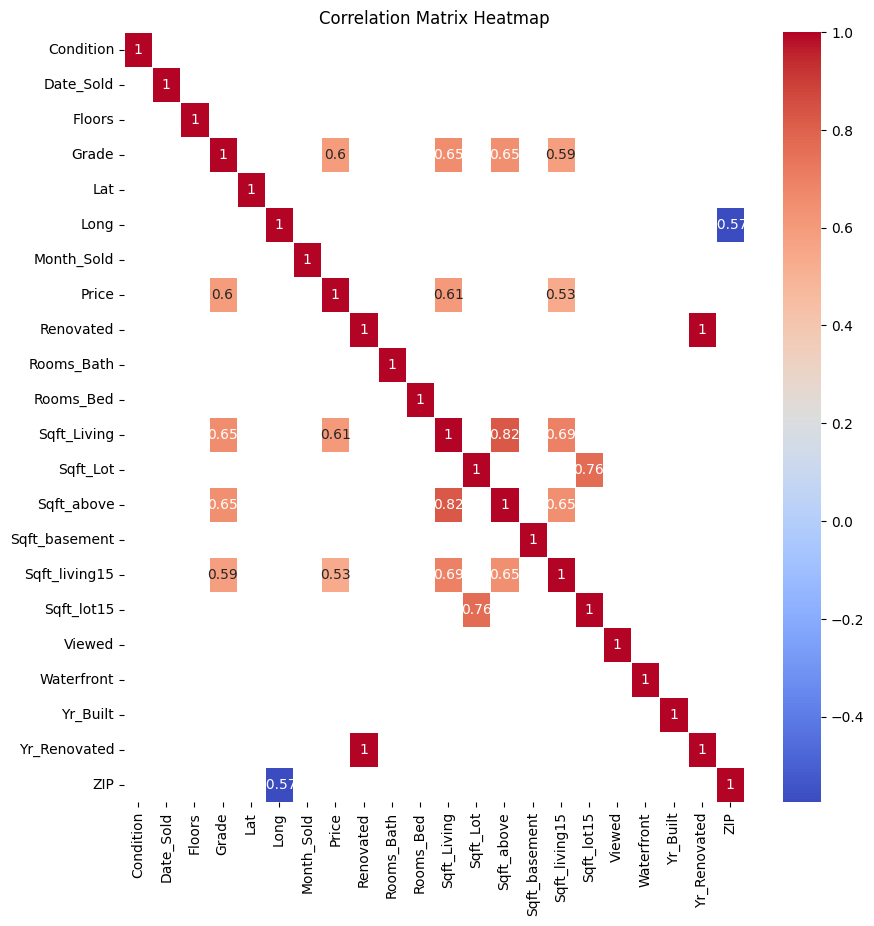

In [11]:
# Correlation matrix
corr_mat = df_fam.corr()
# Show only correlations greater than threshold (otherwise it has been too crowded)
thresh = 0.5
corr_filt = corr_mat[abs(corr_mat) >= thresh]

plt.figure(figsize=(10, 10))
sns.heatmap(corr_filt, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

<span style="color:red">**Highest Correlations**</span>
* Grade - Sqft_living, Sqft_above, Price
* Price - Sqft_living, Grade, Sqft_living15
* Rooms_Bed seems not to correlate to anything
* Sqft_living - Sqft_above, Sqft_living15
* Sqft_lit - Sqft_lot_15

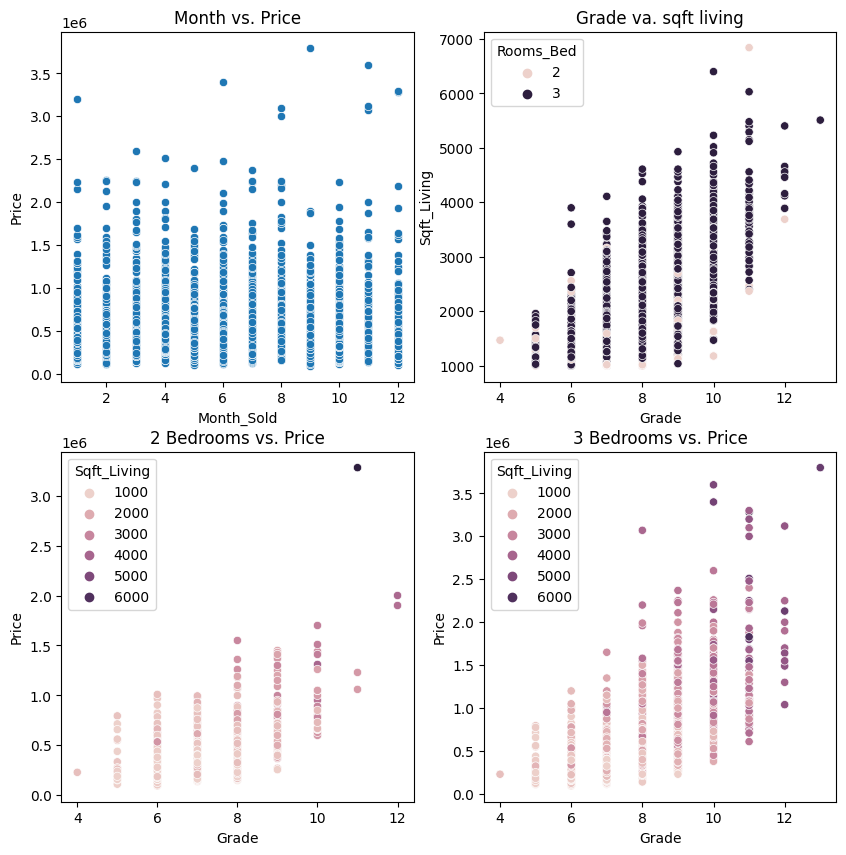

In [12]:
fig, ax = plt.subplots(2, 2, figsize=(10,10))

ax[0, 0].set_title('Month vs. Price')
sns.scatterplot(data=df_fam, x='Month_Sold', y='Price',  ax=ax[0, 0])

ax[0, 1].set_title('Grade va. sqft living')
sns.scatterplot(data=df_fam, x='Grade', y='Sqft_Living', hue='Rooms_Bed', ax=ax[0, 1])

# plotting for houses with 2 bedrooms
bed_2 = df_fam[df_fam.Rooms_Bed <= 2]
ax[1, 0].set_title('2 Bedrooms vs. Price')
sns.scatterplot(data=bed_2, x='Grade', y='Price', hue='Sqft_Living', ax=ax[1, 0])

# plotting for houses with 3 bedrooms
bed_3 = df_fam[df_fam.Rooms_Bed <= 3]
ax[1, 1].set_title('3 Bedrooms vs. Price')
sns.scatterplot(data=bed_3, x='Grade', y='Price', hue='Sqft_Living', ax=ax[1, 1])

plt.show()

<Axes: xlabel='Season', ylabel='Price'>

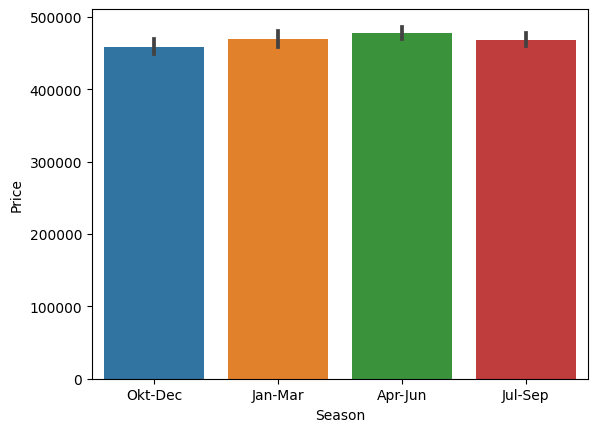

In [13]:
# Adding seasons to the data to look for seasonality in price
spring = [ 4, 5, 6 ]
summer = [ 7, 8, 9 ]
autumn = [ 10, 11, 12 ]
winter = [ 1, 2, 3 ]

df_fam_season = df_fam.copy()

df_fam_season['Season'] = 'Unknown'
df_fam_season.loc[df_fam_season['Month_Sold'].isin(spring), 'Season'] = 'Apr-Jun'
df_fam_season.loc[df_fam_season['Month_Sold'].isin(summer), 'Season'] = 'Jul-Sep'
df_fam_season.loc[df_fam_season['Month_Sold'].isin(autumn), 'Season'] = 'Okt-Dec'
df_fam_season.loc[df_fam_season['Month_Sold'].isin(winter), 'Season'] = 'Jan-Mar'

# WHY IS THIS NOT WORKING???... - I think every command overwrites the whole column! (not just a single value)

#df_fam_season['Season'] = np.where(df_fam_season['Month_Sold'].isin(spring), 'Spring', df_fam_season['Month_Sold'])
#df_fam_season['Season'] = np.where(df_fam_season['Month_Sold'].isin(summer), 'Summer', df_fam_season['Month_Sold'])
#df_fam_season['Season'] = df_fam_season['Month_Sold'].apply(lambda x: 'Spring' if x in(spring) else x)
#df_fam_season['Season'] = df_fam_season['Month_Sold'].apply(lambda x: 'Summer' if x in(summer) else x)
#df_fam_season['Season'] = df_fam_season['Month_Sold'].apply(lambda x: 'Winter' if x in(winter) else x)
#df_fam_season['Season'] = df_fam_season['Month_Sold'].apply(lambda x: 'Autumn' if x in(autumn) else x)
#df_fam[df_fam['Month_Sold'].isin(spring)]

sns.barplot(data=df_fam_season, x='Season', y='Price')
#df_fam_season.Season.isnull().sum()
#df_fam_season.Season.value_counts()

<span style="color:red">**Conclusion**:</span>
* Price seems not related to month sold. So **no seasonal effect on price** the customer can make use of.
* In general you can say, higher prices mean more sqft in Living and Neighborhood
* Grade seems mainly correlating to the size parameters. **Higher Grade means more space** and pricier.
* But also: **You can have a high graded house, still for a reasonable price** (see below as well)
* There seems to be slightly higher prices during January and June. **Better buy July-December**. (I have chosen seasons loosely though)

(0.0, 1000000.0)

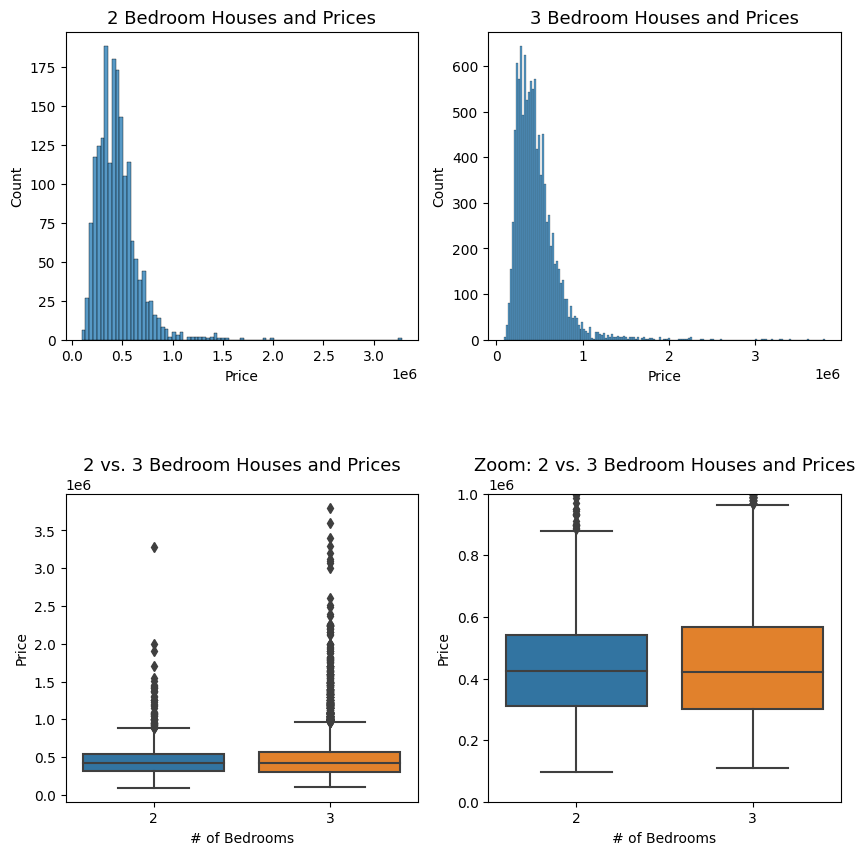

In [14]:
# Define a function to set font sizes for plot elements
def set_font_sizes(ax, title_size=13, label_size=10, tick_label_size=10):
    ax.set_title(ax.get_title(), fontsize=title_size)
    ax.set_xlabel(ax.get_xlabel(), fontsize=label_size)
    ax.set_ylabel(ax.get_ylabel(), fontsize=label_size)
    ax.tick_params(axis='both', labelsize=tick_label_size)

fig, ax = plt.subplots(2, 2, figsize=(10,10), gridspec_kw={'hspace': 0.5})

prices = df_fam['Price']

ax[0, 0].set_title('2 Bedroom Houses and Prices')
sns.histplot(data=bed_2['Price'], ax=ax[0, 0])
set_font_sizes(ax[0, 0])

ax[0, 1].set_title('3 Bedroom Houses and Prices')
sns.histplot(data=bed_3['Price'], ax=ax[0, 1])
set_font_sizes(ax[0, 1])

ax[1, 0].set_title('2 vs. 3 Bedroom Houses and Prices')
sns.boxplot(data=df_fam, x='Rooms_Bed', y='Price', ax=ax[1, 0])
ax[1, 0].set_xlabel('# of Bedrooms')
set_font_sizes(ax[1, 0])


sns.boxplot(data=df_fam, x='Rooms_Bed', y='Price', ax=ax[1, 1])
ax[1, 1].set_xlabel('# of Bedrooms')
ax[1, 1].set_title('Zoom: 2 vs. 3 Bedroom Houses and Prices')
set_font_sizes(ax[1, 1])
ax[1, 1].set_ylim(0, 1000000)


In [15]:
print("Prices of 2-Bedroom Houses:")
display(bed_2.Price.describe())

print("Prices of 3-Bedroom Houses:")
display(bed_3.Price.describe())

Prices of 2-Bedroom Houses:


count       1,824.00
mean      449,602.15
std       213,257.81
min        95,000.00
25%       310,000.00
50%       425,000.00
75%       539,962.50
max     3,280,000.00
Name: Price, dtype: float64

Prices of 3-Bedroom Houses:


count      11,311.00
mean      469,249.68
std       256,519.54
min        95,000.00
25%       302,388.50
50%       420,000.00
75%       560,000.00
max     3,800,000.00
Name: Price, dtype: float64

<span style="color:red">**Conclusion**:</span>
* It looks as if it does **not makes big difference in general in price, if you choose 2 or 3 bedroom house** (Median differs only by 5k).
* Also there are **much more houses available with 3 bedrooms** (~1.8k vs. ~11k), so better chance to find one.
* So the client chooses to **go with the 3 bed room house**, to be more flexible.
 
We now have to check, if there is an issue between location and 2 or 3 bedrooms...

### Comparing extremely low-priced and high-priced 3-bedroom-houses

In [16]:
# Based on the descriptive data above, I define subsets for house prices > 600k and < 300k to spot key differences

print("Houses priced >= 600k:")
bed_3_high = bed_3[bed_3.Price >= 600000].copy()
display(bed_3_high.describe())

print("Houses priced <= 300k:")
bed_3_low = bed_3[bed_3.Price <= 300000].copy()
display(bed_3_low.describe())

Houses priced >= 600k:


,Condition,Date_Sold,Floors,Grade,Lat,Long,Month_Sold,Price,Renovated,Rooms_Bath,Rooms_Bed,Sqft_Living,Sqft_Lot,Sqft_above,Sqft_basement,Sqft_living15,Sqft_lot15,Viewed,Yr_Built,Yr_Renovated,ZIP
count,"2,322.00",2322,"2,322.00","2,322.00","2,322.00","2,322.00","2,322.00","2,322.00","2,322.00","2,322.00","2,322.00","2,322.00","2,322.00","2,322.00","2,273.00","2,322.00","2,322.00","2,322.00","2,322.00","2,322.00","2,322.00"
mean,3.50,2014-11-01 00:54:34.418604544,1.60,8.34,47.62,-122.24,6.40,"833,827.02",0.07,1.85,2.87,"2,349.47","20,283.11","1,985.30",363.51,"2,277.35","15,452.66",0.61,"1,966.54",134.97,"98,083.76"
min,1.00,2014-05-02 00:00:00,1.00,5.00,47.16,-122.51,1.00,"600,000.00",0.00,0.00,2.00,"1,000.00",609.00,580.00,0.00,910.00,958.00,0.00,"1,900.00",-1.00,"98,001.00"
25%,3.00,2014-07-18 00:00:00,1.00,8.00,47.58,-122.35,4.00,"654,475.00",0.00,1.00,3.00,"1,780.00","4,450.50","1,420.00",0.00,"1,770.00","4,537.50",0.00,"1,941.00",-1.00,"98,038.00"
50%,3.00,2014-10-16 00:00:00,1.50,8.00,47.64,-122.28,6.00,"730,550.50",0.00,2.00,3.00,"2,260.00","7,106.00","1,840.00",0.00,"2,210.00","6,995.50",0.00,"1,971.00",-1.00,"98,103.00"
75%,4.00,2015-02-25 00:00:00,2.00,9.00,47.68,-122.14,9.00,"872,937.50",0.00,2.00,3.00,"2,770.00","12,123.75","2,450.00",700.00,"2,690.00","11,448.00",0.00,"1,995.75",-1.00,"98,117.00"
max,5.00,2015-05-14 00:00:00,3.00,13.00,47.77,-121.70,12.00,"3,800,000.00",1.00,4.00,3.00,"6,840.00","982,278.00","5,480.00","2,490.00","4,950.00","560,617.00",4.00,"2,015.00","2,015.00","98,199.00"
std,0.69,NaN,0.56,1.12,0.08,0.13,3.04,"320,967.76",0.25,0.67,0.34,759.71,"58,048.43",741.10,454.12,637.93,"34,747.71",1.18,32.81,503.31,52.14


Houses priced <= 300k:


,Condition,Date_Sold,Floors,Grade,Lat,Long,Month_Sold,Price,Renovated,Rooms_Bath,Rooms_Bed,Sqft_Living,Sqft_Lot,Sqft_above,Sqft_basement,Sqft_living15,Sqft_lot15,Viewed,Yr_Built,Yr_Renovated,ZIP
count,"2,812.00",2812,"2,812.00","2,812.00","2,812.00","2,812.00","2,812.00","2,812.00","2,812.00","2,812.00","2,812.00","2,812.00","2,812.00","2,812.00","2,758.00","2,812.00","2,812.00","2,812.00","2,812.00","2,812.00","2,812.00"
mean,3.41,2014-10-30 23:09:18.179231744,1.25,6.87,47.42,-122.21,6.62,"243,595.56",0.02,1.36,2.85,"1,454.98","10,413.06","1,325.09",129.49,"1,554.23","10,126.30",0.03,"1,969.95",37.94,"98,068.44"
min,1.00,2014-05-02 00:00:00,1.00,4.00,47.18,-122.51,1.00,"95,000.00",0.00,0.00,2.00,"1,000.00",572.00,580.00,0.00,460.00,651.00,0.00,"1,900.00",-1.00,"98,001.00"
25%,3.00,2014-07-26 18:00:00,1.00,7.00,47.33,-122.32,4.00,"218,875.00",0.00,1.00,3.00,"1,200.00","6,300.75","1,100.00",0.00,"1,310.00","6,600.00",0.00,"1,956.00",-1.00,"98,023.00"
50%,3.00,2014-10-22 12:00:00,1.00,7.00,47.39,-122.24,7.00,"250,000.00",0.00,1.00,3.00,"1,400.00","8,000.00","1,280.00",0.00,"1,520.00","8,000.00",0.00,"1,969.00",-1.00,"98,042.00"
75%,4.00,2015-02-11 00:00:00,1.50,7.00,47.49,-122.16,9.00,"275,000.00",0.00,2.00,3.00,"1,650.00","9,938.50","1,500.00",150.00,"1,740.00","9,604.25",0.00,"1,987.00",-1.00,"98,118.00"
max,5.00,2015-05-14 00:00:00,3.00,9.00,47.78,-121.32,12.00,"300,000.00",1.00,3.00,3.00,"3,080.00","389,126.00","3,030.00","1,470.00","3,557.00","335,289.00",3.00,"2,015.00","2,014.00","98,198.00"
std,0.63,NaN,0.43,0.61,0.13,0.13,3.22,"39,804.19",0.14,0.50,0.35,323.70,"17,181.68",306.36,248.20,346.07,"16,202.76",0.26,23.32,275.77,60.60


In [17]:
# This was a test using ChatGPT Code (worked as well)
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Assuming you have 'bed_3_high' and 'bed_3_low' DataFrames

# # Concatenate the 'Floors' columns from both DataFrames
# data = pd.concat([bed_3_high['Floors'], bed_3_low['Floors']], axis=1)
# data.columns = ['High', 'Low']  # Rename columns for clarity
# display(data)

# # Melt the DataFrame to make it suitable for a barplot
# data_melted = data.melt(var_name='Group', value_name='Floors')
# display(data_melted)

# # Create the barplot
# plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
# sns.countplot(data=data_melted, x='Floors', hue='Group', palette='Set1')

# # Set labels and title
# plt.xlabel('Floors')
# plt.ylabel('Count')
# plt.title('Comparison of Floors between high- and low-priced 3-bed-homes')

# # Show the plot
# plt.show()


Text(0.5, 1.0, 'High&Low priced 3 Bedroom Houses: Rooms Bath')

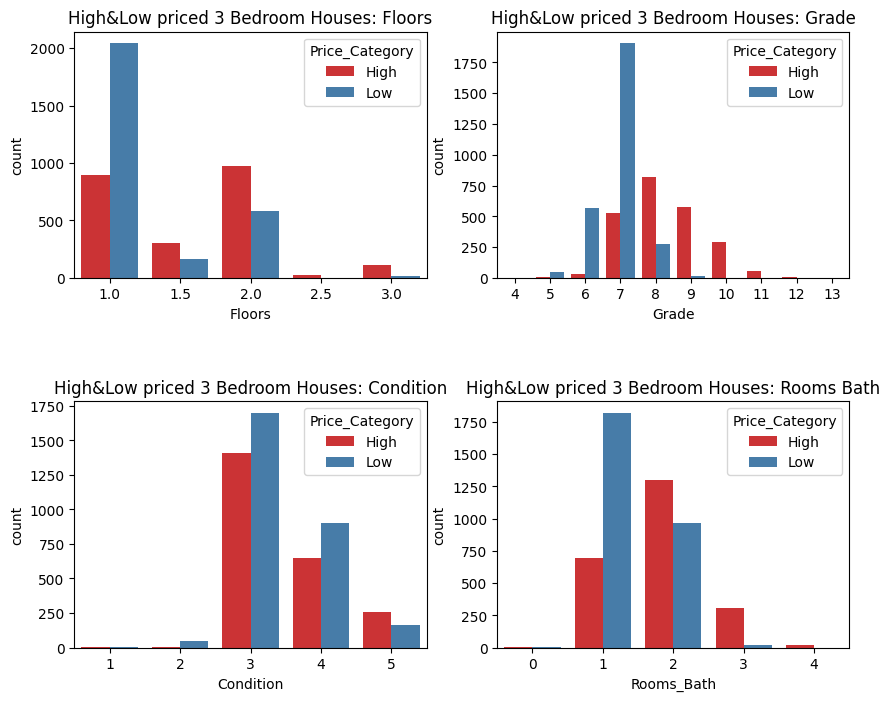

In [18]:
# add column to mark houses as "high" priced or "low" priced
bed_3_high['Price_Category'] = 'High'
bed_3_low['Price_Category'] = 'Low'
bed_3_hilo = pd.concat([bed_3_high, bed_3_low], join='inner', axis=0)


fig, axes = plt.subplots(2, 2, figsize=(10, 8), gridspec_kw={'hspace': 0.5})

# Plot data


sns.countplot(data=bed_3_hilo, x='Floors', hue='Price_Category', palette='Set1', ax=axes[0, 0])
axes[0, 0].set_title('High&Low priced 3 Bedroom Houses: Floors')

sns.countplot(data=bed_3_hilo, x='Grade', hue='Price_Category', palette='Set1', ax=axes[0, 1])
axes[0, 1].set_title('High&Low priced 3 Bedroom Houses: Grade')

sns.countplot(data=bed_3_hilo, x='Condition', hue='Price_Category', palette='Set1', ax=axes[1, 0])
axes[1, 0].set_title('High&Low priced 3 Bedroom Houses: Condition')

sns.countplot(data=bed_3_hilo, x='Rooms_Bath', hue='Price_Category', palette='Set1', ax=axes[1, 1])
axes[1, 1].set_title('High&Low priced 3 Bedroom Houses: Rooms Bath')


<span style="color:red">**Conclusion**</span>
* Houses of **grade 7 and condition 3** seem to be most available. The client should look for houses of that category to have a higher change of buying fast.

### Check availability on market

In [19]:
grade_7 = bed_3_hilo[ bed_3_hilo['Grade'] == 7].copy()
grade_7.describe()


,Condition,Date_Sold,Floors,Grade,Lat,Long,Month_Sold,Price,Renovated,Rooms_Bath,Rooms_Bed,Sqft_Living,Sqft_Lot,Sqft_above,Sqft_basement,Sqft_living15,Sqft_lot15,Viewed,Yr_Built,Yr_Renovated,ZIP
count,"2,435.00",2435,"2,435.00","2,435.00","2,435.00","2,435.00","2,435.00","2,435.00","2,435.00","2,435.00","2,435.00","2,435.00","2,435.00","2,435.00","2,385.00","2,435.00","2,435.00","2,435.00","2,435.00","2,435.00","2,435.00"
mean,3.49,2014-11-02 16:56:34.496919808,1.26,7.00,47.46,-122.23,6.57,"347,951.40",0.02,1.39,2.88,"1,540.57","10,054.60","1,344.74",194.90,"1,636.04","9,563.72",0.09,"1,966.76",44.03,"98,071.40"
min,1.00,2014-05-02 00:00:00,1.00,7.00,47.18,-122.51,1.00,"115,000.00",0.00,0.00,2.00,"1,000.00",572.00,620.00,0.00,460.00,659.00,0.00,"1,900.00",-1.00,"98,001.00"
25%,3.00,2014-07-25 00:00:00,1.00,7.00,47.35,-122.32,4.00,"233,000.00",0.00,1.00,3.00,"1,270.00","5,555.00","1,110.00",0.00,"1,400.00","5,540.00",0.00,"1,953.50",-1.00,"98,028.00"
50%,3.00,2014-10-24 00:00:00,1.00,7.00,47.43,-122.26,6.00,"265,000.00",0.00,1.00,3.00,"1,481.00","7,727.00","1,300.00",0.00,"1,580.00","7,777.00",0.00,"1,967.00",-1.00,"98,045.00"
75%,4.00,2015-02-18 00:00:00,1.50,7.00,47.58,-122.17,9.00,"299,250.00",0.00,2.00,3.00,"1,740.00","9,750.00","1,520.00",400.00,"1,800.00","9,520.00",0.00,"1,986.00",-1.00,"98,115.00"
max,5.00,2015-05-14 00:00:00,3.00,7.00,47.78,-121.32,12.00,"1,650,000.00",1.00,3.00,3.00,"4,110.00","389,126.00","4,110.00","1,730.00","3,557.00","310,582.00",4.00,"2,014.00","2,014.00","98,199.00"
std,0.66,NaN,0.44,0.00,0.15,0.13,3.20,"201,696.34",0.15,0.51,0.33,368.30,"17,097.46",315.67,308.82,361.22,"15,502.25",0.46,25.41,296.27,58.68


In [20]:
# Define price ranges
price_bins = [0, 230000, 265000, 300000, float('inf')] 
price_labels = ['0-230k', '230k-265k', '265k-300k', '300k+'] 

grade_7['Price_Range'] = pd.cut(df['Price'], bins=price_bins, labels=price_labels, right=False)

<Axes: xlabel='Price_Range', ylabel='count'>

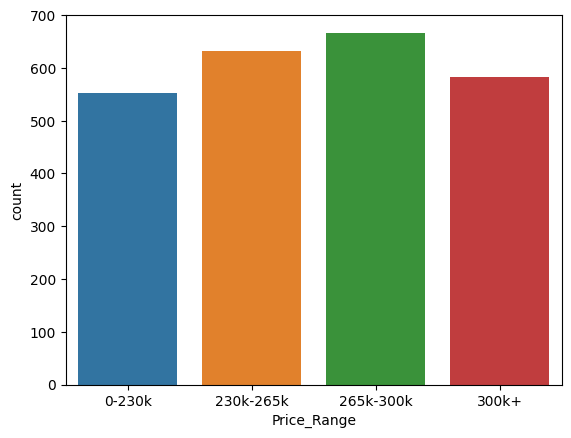

In [21]:
sns.countplot(data=grade_7, x='Price_Range')#, y='Price' )

<span style="color:red">**Conclusion**</span>:
* **Best availability of houses in price range 230k-300k**. So look there to be potentially faster in buying.
* Even though the price range of 0-230k has smaller market (potentially lower availability), **the customer decided to include those - lowe price is in the end key**

### Looking for central location / lively neighborhood in the <=300k price range

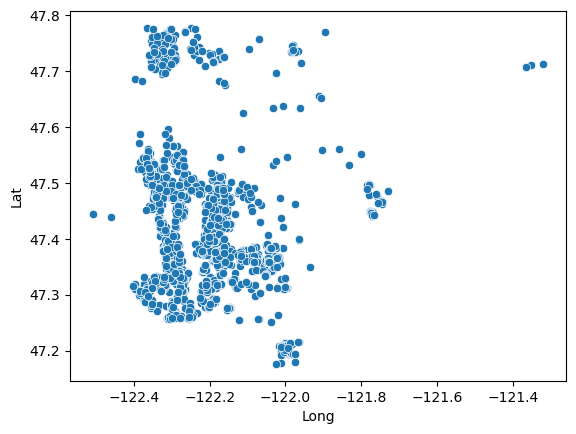

In [22]:
# Plotting grad_7 3-bedroom houses of affordable price range
grade_7_affordable = grade_7[grade_7['Price'] <= 300000].copy()
sns.scatterplot(data=grade_7_affordable, x='Long', y='Lat')
plt.show()

#### Interactive map (HTML)

In [23]:
import folium

def create_map(data, name):
    # Create a folium Map object
    m = folium.Map(location=[47.51, -122.26], zoom_start=10)

    # Iterate over your dataset and add markers for each ZIP Code
    for index, row in data.iterrows():
        folium.Marker(
            location=[row['Lat'], row['Long']],
            popup=row['ZIP'],  # Display ZIP Code as popup text
            icon=folium.Icon(color='blue')
        ).add_to(m)

    # Save the map as an HTML file
    m.save(name)

data = grade_7_affordable.copy()
create_map(data, 'map_affordable.html')

#### Promising areas: Areas with 50+ available houses of wanted criteria and plot / list most crowded areas

In [24]:

# Display all data without abbreviation
# pd.set_option('display.max_rows', None) 

promising_zips = grade_7_affordable.ZIP.value_counts()

# Select data based on ZIP areas that is matching criteria and has potentially high availability (50+ houses available)
houses_in_promising_zips = df_fam[df_fam['ZIP'].isin(promising_zips[promising_zips > 50].index)]
#houses_in_promising_zips

create_map(houses_in_promising_zips, 'map_crowded.html')

print(f"Promising ZIPs with good market: \n {promising_zips.head(5)}\n\n")

# Most crowded areas
print("A look at how crowded these ZIPs are (including offers out of customer's range):")
houses_in_promising_zips.ZIP.value_counts().head(10)

# Flag the entries which are located in ZIPs with 50+ houses matching the criteria
#grade_7_affordable['HighAvailable50'] = grade_7_affordable.ZIP['grade_7_affordable.ZIP']

Promising ZIPs with good market: 
 ZIP
98042    172
98038    130
98023    125
98001    120
98003    109
Name: count, dtype: int64


A look at how crowded these ZIPs are (including offers out of customer's range):


ZIP
98038    316
98042    309
98023    277
98058    220
98001    193
98092    181
98003    174
98198    161
98022    156
98055    153
Name: count, dtype: int64

<span style="color:red">**Conclusion**:</span>
* The above ZIP codes should be good suited to look for a 3 Bed House.
* Market (potential availability) should be good, as there are at least 50 houses available in that zip matching your criteria 

### Hand-picked ZIP codes: close to centers and crowded

In [31]:
from sklearn.cluster import KMeans

# Assuming you have a DataFrame 'df' with 'latitude' and 'longitude' columns
data = df_fam[['Lat', 'Long']]

# Choose the number of clusters (K)
k = 8

kmeans = KMeans(n_clusters=k, n_init='auto')
df_fam['Cluster'] = kmeans.fit_predict(data)


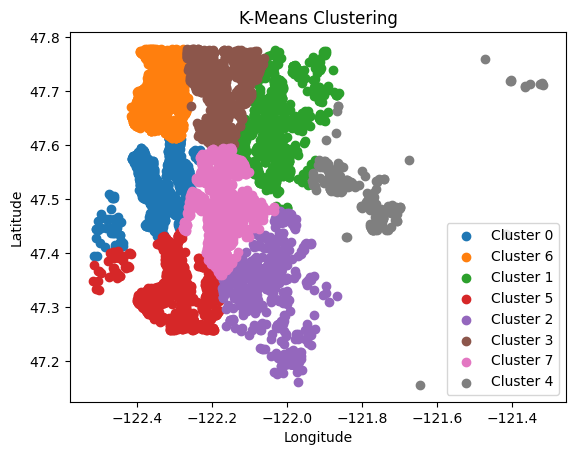

In [32]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with a 'cluster' column
for cluster in df_fam['Cluster'].unique():
    cluster_data = df_fam[df_fam['Cluster'] == cluster]
    plt.scatter(cluster_data['Long'], cluster_data['Lat'], label=f'Cluster {cluster}')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.title('K-Means Clustering')
plt.show()


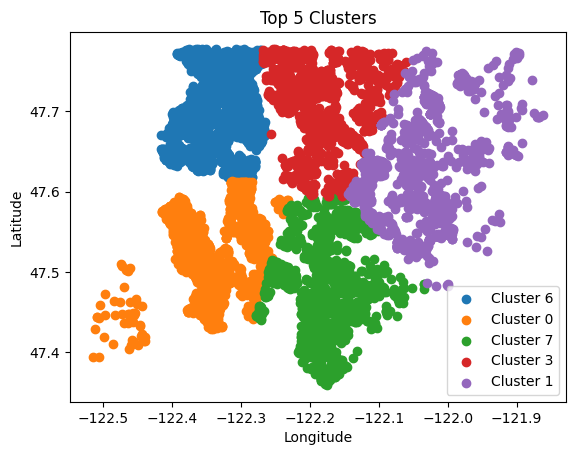

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with 'latitude', 'longitude', and 'cluster' columns

# Calculate the size of each cluster
cluster_sizes = df_fam['Cluster'].value_counts().reset_index()
cluster_sizes.columns = ['Cluster', 'size']

# Sort the clusters by size and select the top 5
top_clusters = cluster_sizes.sort_values(by='size', ascending=False).head(5)

# Filter the DataFrame to include only data points from the top clusters
filtered_df = df_fam[df_fam['Cluster'].isin(top_clusters['Cluster'])]

# Create a scatter plot for the filtered data
for cluster in top_clusters['Cluster']:
    cluster_data = filtered_df[filtered_df['Cluster'] == cluster]
    plt.scatter(cluster_data['Long'], cluster_data['Lat'], label=f'Cluster {cluster}')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.title('Top 5 Clusters')
plt.show()

In [29]:
from sklearn.cluster import DBSCAN
import numpy as np

# Assuming you have a DataFrame 'df' with 'latitude' and 'longitude' columns
data = df_fam[['Lat', 'Long']]

# Define the radius (epsilon) for DBSCAN
epsilon = 0.009  # Adjust this value based on your data and desired radius

dbscan = DBSCAN(eps=epsilon, min_samples=5)  # You can adjust min_samples as needed
df_fam['cluster'] = dbscan.fit_predict(data)


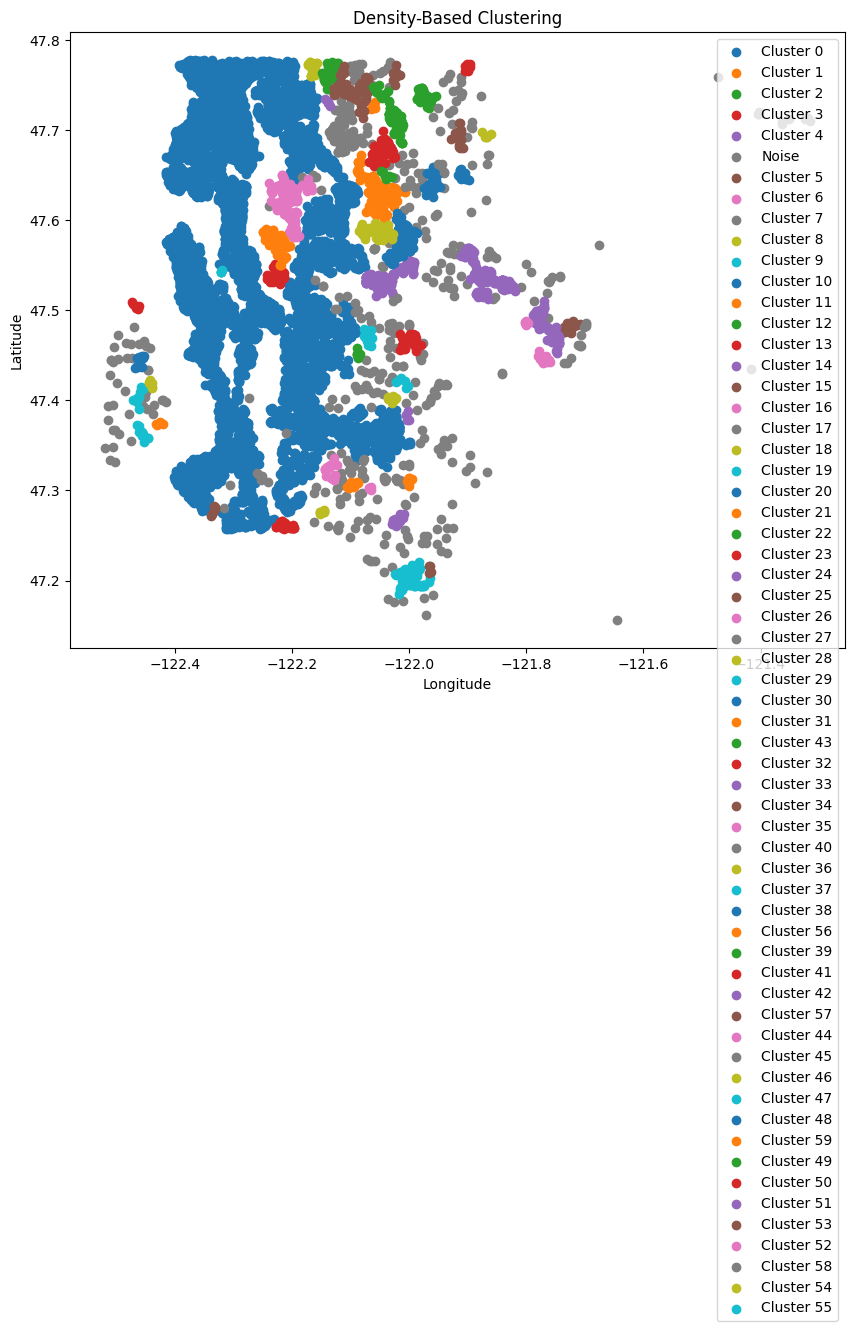

In [30]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with a 'cluster' column
plt.figure(figsize=(10, 8))

# Plot clusters with different colors
for cluster in df_fam['cluster'].unique():
    if cluster == -1:
        # -1 represents noise points (not in any cluster)
        noise_data = df_fam[df_fam['cluster'] == cluster]
        plt.scatter(noise_data['Long'], noise_data['Lat'], c='gray', label='Noise')
    else:
        cluster_data = df_fam[df_fam['cluster'] == cluster]
        plt.scatter(cluster_data['Long'], cluster_data['Lat'], label=f'Cluster {cluster}')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.title('Density-Based Clustering')
plt.show()


### Tools

In [28]:
df_fam.shape
# Are all entries int or float?
#def is_number(variable):
#    return isinstance(variable, (int, float))

#df[df['Sqft_basement'].apply(lambda x: is_number(x))]

#df['Viewed'].value_counts()
#df['view'].isna().sum()
#df['waterfront'].astype(bool)
#df.head()
#df.info()

#df[(df.Viewed > 0) & df.Date_Sold]

(11311, 23)